# Challenge 1

## 1. Basics of Image and Signal Processing (LE1)

### 1.1. Image Properties

Day 1

Find or acquire 1-3 images related to your selected country. The images should be suitable for demonstrating adjustments to image properties brightness,hue in experiments.

The pictures re from when i was living in Mexico.
repository at https://github.com/BR4GR/gbsv-challenges
code writen with the help of the Deep Dive repo chatgpt and opencv.org

In [1]:
import cv2 as cv
import librosa
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time as time1

from ipywidgets import interact, widgets
from matplotlib import pyplot as plt
from matplotlib.widgets import Slider, Button, TextBox
from scipy.io.wavfile import write

jellyfish.shape=(3648, 5472, 3)
jellyfish.dtype=dtype('uint8')
np.max(jellyfish)=np.uint8(255)
np.min(jellyfish)=np.uint8(0)


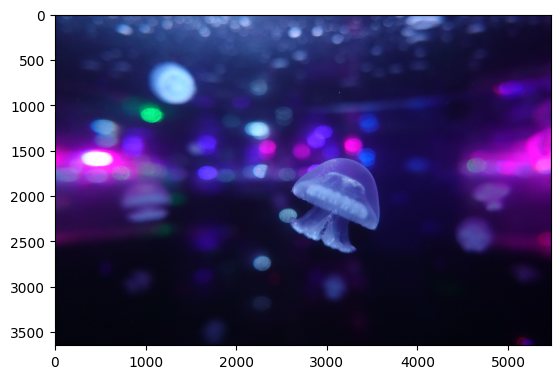

cavediving.shape=(3648, 5472, 3)
cavediving.dtype=dtype('uint8')
np.max(cavediving)=np.uint8(255)
np.min(cavediving)=np.uint8(0)


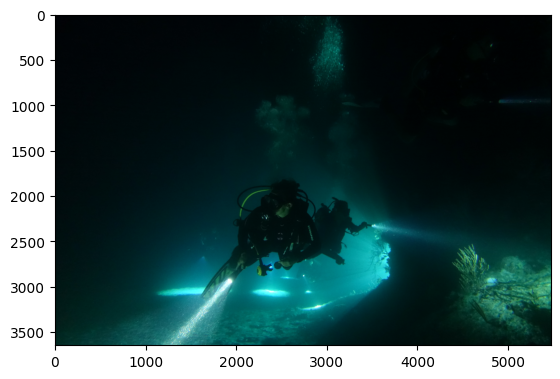

sunrise.shape=(4000, 6000, 3)
sunrise.dtype=dtype('uint8')
np.max(sunrise)=np.uint8(255)
np.min(sunrise)=np.uint8(0)


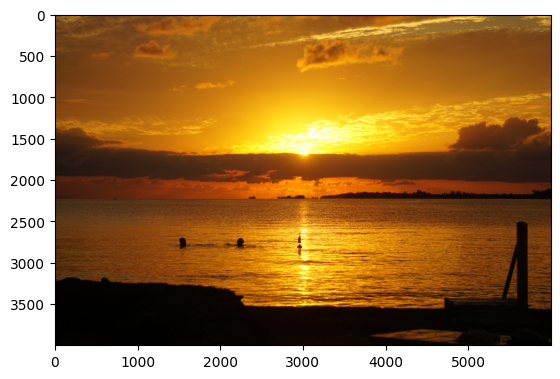

In [2]:
jellyfish = cv.imread('jellyfish.jpg')
print(f"{jellyfish.shape=}\n{jellyfish.dtype=}\n{np.max(jellyfish)=}\n{np.min(jellyfish)=}")
jellyfish = cv.cvtColor(jellyfish, cv.COLOR_BGR2RGB)

plt.imshow(jellyfish)
plt.show()

cavediving = cv.imread('cavediving.jpg')
print(f"{cavediving.shape=}\n{cavediving.dtype=}\n{np.max(cavediving)=}\n{np.min(cavediving)=}")
cavediving = cv.cvtColor(cavediving, cv.COLOR_BGR2RGB)

plt.imshow(cavediving)
plt.show()

sunrise = cv.imread('sunrise.jpg')
print(f"{sunrise.shape=}\n{sunrise.dtype=}\n{np.max(sunrise)=}\n{np.min(sunrise)=}")
sunrise = cv.cvtColor(sunrise, cv.COLOR_BGR2RGB)
plt.imshow(sunrise)
plt.show()

In [3]:

# Function to adjust brightness for an RGB image
def adjust_brightness(image, brightness=0):
    """
    Adjust the brightness of an RGB image.
    
    Parameters:
    - image: Input image in RGB format
    - brightness: Amount to adjust brightness (can be positive or negative)
    
    Returns:
    - Brightness-adjusted image
    """
    # Convert image to float32 to avoid overflow issues when adding/subtracting
    image = np.int16(image)
    image = image + brightness
    image = np.clip(image, 0, 255)  # Ensure values stay within [0, 255]
    return np.uint8(image)

# Function to adjust hue for an RGB image
def adjust_hue(image, hue_shift=0):
    """
    Adjust the hue of an RGB image.
    
    Parameters:
    - image: Input image in RGB format
    - hue_shift: Amount to shift the hue by (in degrees)
    
    Returns:
    - Hue-adjusted image
    """
    # Convert to HSV (Hue, Saturation, Value)
    hsv_image = cv.cvtColor(image, cv.COLOR_RGB2HSV)
    
    # Adjust the hue channel (hue is in range 0-179 in OpenCV)
    hue = hsv_image[:, :, 0].astype(int)  # Convert hue channel to int to avoid overflow
    hue = (hue + hue_shift) % 180  # Ensure hue stays within the range [0, 179]
    hsv_image[:, :, 0] = hue.astype(np.uint8)  # Convert back to uint8

    # Convert back to RGB
    return cv.cvtColor(hsv_image, cv.COLOR_HSV2RGB)

# Function to apply both brightness and hue adjustments
def apply_adjustments(image, brightness=0, hue_shift=0):
    bright_image = adjust_brightness(image, brightness)
    final_image = adjust_hue(bright_image, hue_shift)
    return final_image

# Function to display the original and adjusted images side by side
def display_images_side_by_side(image, brightness=0, hue_shift=0, ax=None, title="Image"):
    """
    Display the original and adjusted images side by side for comparison.
    
    Parameters:
    - image: The input image in RGB format
    - brightness: Amount to adjust brightness
    - hue_shift: Amount to shift the hue by
    """
    adjusted_image = apply_adjustments(image, brightness, hue_shift)

    # Original image
    ax[0].imshow(image)
    ax[0].set_title(f'Original {title}')
    ax[0].axis('off')
    
    # Adjusted image
    ax[1].imshow(adjusted_image)
    ax[1].set_title(f'Adjusted {title} (Brightness: {brightness}, Hue: {hue_shift})')
    ax[1].axis('off')

# Function to display all 3 images side by side with independent controls
def update_images(brightness_jellyfish=0, hue_jellyfish=0, 
                  brightness_cave=0, hue_cave=0, 
                  brightness_sunrise=0, hue_sunrise=0):
    
    fig, axes = plt.subplots(3, 2, figsize=(12, 12))

    # jellyfish
    display_images_side_by_side(jellyfish, brightness_jellyfish, hue_jellyfish, axes[0], "jellyfish")
    
    # Cave Diving
    display_images_side_by_side(cavediving, brightness_cave, hue_cave, axes[1], "dave diving")
    
    # sunrise
    display_images_side_by_side(sunrise, brightness_sunrise, hue_sunrise, axes[2], "sunrise")
    
    plt.tight_layout()
    plt.show()

# Create interactive sliders for each image
brightness_jellyfish_slider = widgets.IntSlider(min=-100, max=100, step=1, value=-40, description='jellyfish Brightness')
hue_jellyfish_slider = widgets.IntSlider(min=-90, max=90, step=10, value=40, description='jellyfish Hue Shift')

brightness_cave_slider = widgets.IntSlider(min=-100, max=100, step=1, value=-10, description='Cave Brightness')
hue_cave_slider = widgets.IntSlider(min=-90, max=90, step=10, value=20, description='Cave Hue Shift')

brightness_sunrise_slider = widgets.IntSlider(min=-100, max=100, step=1, value=10, description='sunrise Brightness')
hue_sunrise_slider = widgets.IntSlider(min=-90, max=90, step=10, value=-20, description='sunrise Hue Shift')

# Interactive widget for updating images
interact(update_images, 
         brightness_jellyfish=brightness_jellyfish_slider, hue_jellyfish=hue_jellyfish_slider, 
         brightness_cave=brightness_cave_slider, hue_cave=hue_cave_slider,
         brightness_sunrise=brightness_sunrise_slider, hue_sunrise=hue_sunrise_slider);


interactive(children=(IntSlider(value=-40, description='jellyfish Brightness', min=-100), IntSlider(value=40, …